<a href="https://colab.research.google.com/github/Jit562/Panda_with_Sql_Project/blob/main/SQL_With_pandas_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libarary

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load data set

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/Auto Sales data.csv', encoding = 'unicode_escape')

## Check the basic Data information using pandas

In [3]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.shape

(2747, 20)

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

## Connect with database

In [8]:
conn = sqlite3.connect('auto_sale')

## Convert the data into sql

In [9]:
df.to_sql('autosale', conn, if_exists = 'replace', index = False)

2747

In [10]:
# close the table
conn.close()

In [11]:
# Open the db
conn = sqlite3.connect('auto_sale')
conn.commit()

## Connect cursor and check the table available in the database

In [12]:
cursor = conn.cursor()
cursor.execute(''' select name from sqlite_master where type = 'table' ''')
print('List of the table name ')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of the table name 


['autosale']

## Start sql query here........

In [13]:
pd.read_sql_query('''

select * from autosale

''', conn)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24 00:00:00,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07 00:00:00,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01 00:00:00,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25 00:00:00,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28 00:00:00,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02 00:00:00,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31 00:00:00,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01 00:00:00,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28 00:00:00,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


## Find the top 5 data

In [14]:
pd.read_sql_query('''

select *  from autosale
limit 5

''', conn)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24 00:00:00,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07 00:00:00,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01 00:00:00,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25 00:00:00,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28 00:00:00,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


## Find the top sales which type of product  

In [15]:
pd.read_sql_query('''

select productline, count(ORDERNUMBER) as Sale_Order from autosale
group by productline
order by count(ORDERNUMBER) desc

''', conn)

,PRODUCTLINE,Sale_Order
0,Classic Cars,949
1,Vintage Cars,579
2,Motorcycles,313
3,Planes,304
4,Trucks and Buses,295
5,Ships,230
6,Trains,77


In [16]:
pd.read_sql_query('''

select productline, count(ORDERNUMBER) as Sale_Order from autosale
group by productline
order by count(ORDERNUMBER) desc
limit 1
''', conn)

,PRODUCTLINE,Sale_Order
0,Classic Cars,949


## Using window function

In [17]:
pd.read_sql_query('''

select distinct(PRODUCTLINE),
count(ORDERNUMBER) over(PARTITION BY PRODUCTLINE) as product_count
from autosale

''', conn)

,PRODUCTLINE,product_count
0,Classic Cars,949
1,Motorcycles,313
2,Planes,304
3,Ships,230
4,Trains,77
5,Trucks and Buses,295
6,Vintage Cars,579


In [18]:
top_sale = pd.read_sql_query('''

select productline, count(ORDERNUMBER) as Sale_Order from autosale
group by productline
order by count(ORDERNUMBER) desc

''', conn)

## Display product sales in graphical representation.

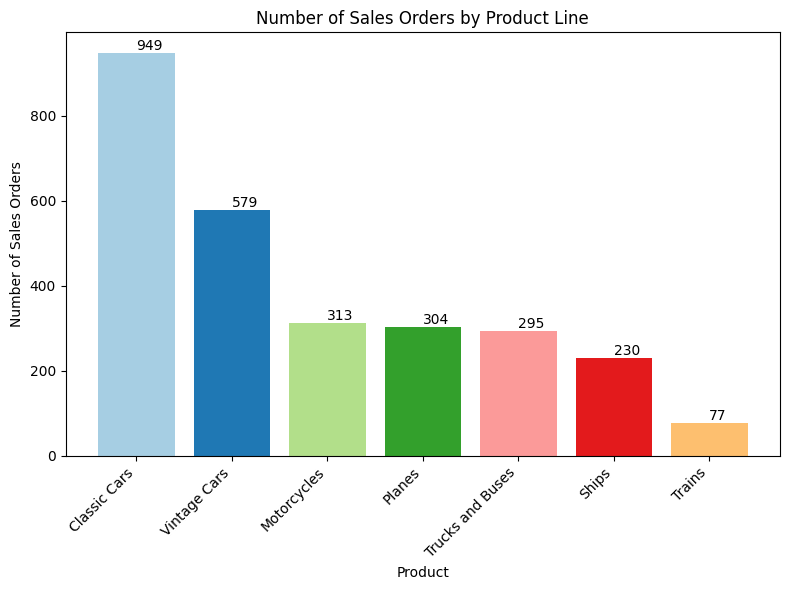

In [19]:
# Create a bar chart
plt.figure(figsize=(8, 6))
bar_plot = plt.bar(top_sale['PRODUCTLINE'], top_sale['Sale_Order'], color=plt.cm.Paired.colors)

plt.xlabel('Product')
plt.ylabel('Number of Sales Orders')
plt.title('Number of Sales Orders by Product Line')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

## Number of Sales Orders by Product Line In percentage form

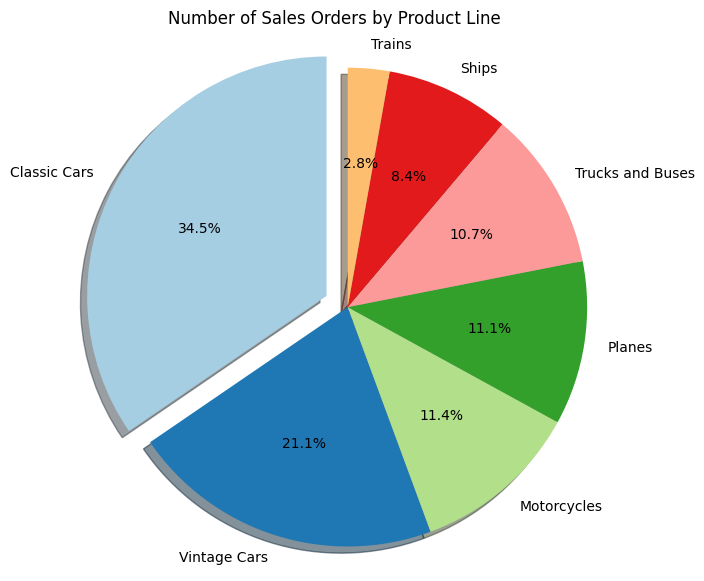

In [20]:
# Create a pie chart
plt.figure(figsize=(7, 7))
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(top_sale['Sale_Order'], labels=top_sale['PRODUCTLINE'], shadow = True, autopct='%1.1f%%', explode=explode , startangle=90, colors=plt.cm.Paired.colors)
plt.title('Number of Sales Orders by Product Line ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Find the order status

In [21]:
pd.read_sql_query('''


select status , count(ORDERNUMBER) as oredr_count from autosale
group by status
order by count(ORDERNUMBER) desc


 ''', conn)

,STATUS,oredr_count
0,Shipped,2541
1,Cancelled,60
2,Resolved,47
3,On Hold,44
4,In Process,41
5,Disputed,14


In [22]:
status = pd.read_sql_query('''


select status , count(ORDERNUMBER) as oredr_count from autosale
group by status
order by count(ORDERNUMBER) desc


 ''', conn)

## Order status represent in percentage

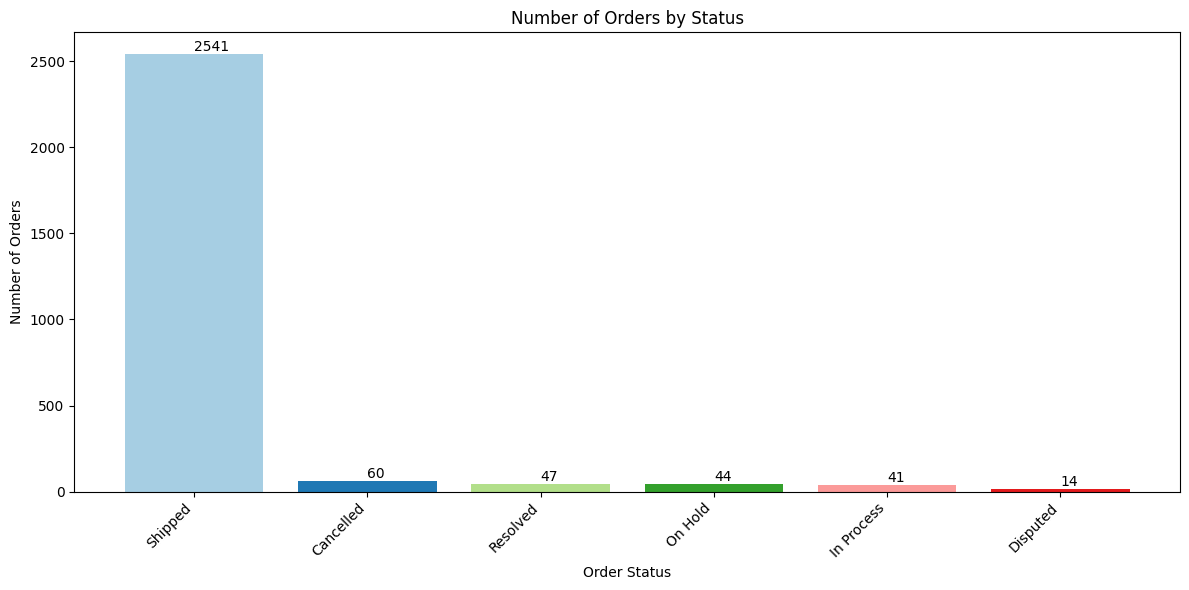

In [23]:
# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(status['STATUS'], status['oredr_count'], color=plt.cm.Paired.colors)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va='bottom' places the text above the bar

plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

## Find all Countries by City with the Order status and Product type

In [24]:
# find the shipped order
pd.read_sql_query('''

select COUNTRY, CITY, PRODUCTLINE, count(status) as shipped_count from autosale
group by COUNTRY, PRODUCTLINE
having STATUS = 'Shipped'

order by country asc, CITY asc

''', conn)

,COUNTRY,CITY,PRODUCTLINE,shipped_count
0,Australia,Chatswood,Ships,2
1,Australia,Melbourne,Motorcycles,26
2,Australia,Melbourne,Planes,25
3,Australia,Melbourne,Vintage Cars,58
4,Australia,South Brisbane,Classic Cars,53
...,...,...,...,...
103,USA,Glendale,Planes,93
104,USA,NYC,Motorcycles,131
105,USA,NYC,Vintage Cars,196
106,USA,San Rafael,Trains,25


In [25]:
# Find Not shipped order
pd.read_sql_query('''

select COUNTRY, CITY, PRODUCTLINE, count(status) as Not_shipped_order from autosale
group by COUNTRY, PRODUCTLINE
having STATUS != 'Shipped'

order by count(status) desc

''', conn)

,COUNTRY,CITY,PRODUCTLINE,Not_shipped_order
0,Spain,Madrid,Planes,30
1,Spain,Madrid,Motorcycles,19
2,Belgium,Bruxelles,Vintage Cars,14
3,Denmark,Kobenhavn,Ships,14
4,Sweden,Boras,Ships,10
5,Austria,Graz,Trucks and Buses,5
6,Sweden,Boras,Planes,3
7,Denmark,Kobenhavn,Planes,2


In [26]:
# Find Not shipped order
not_ship = pd.read_sql_query('''

select COUNTRY, CITY, PRODUCTLINE, count(status) as Not_shipped_order from autosale
group by COUNTRY, PRODUCTLINE
having STATUS != 'Shipped'

order by count(status) desc

''', conn)

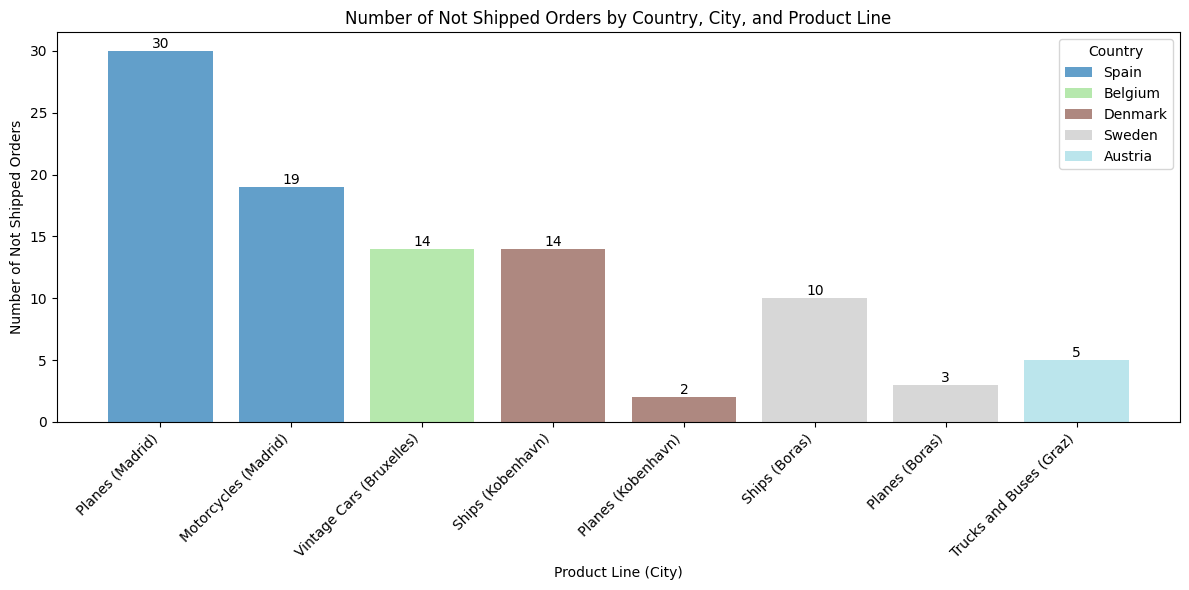

In [27]:
plt.figure(figsize=(12, 6))

# Create a color map for different countries
colors = plt.cm.get_cmap('tab20', len(not_ship['COUNTRY'].unique()))

# Plot data
for i, country in enumerate(not_ship['COUNTRY'].unique()):
    subset = not_ship[not_ship['COUNTRY'] == country]
    bars = plt.bar(subset['PRODUCTLINE'] + " (" + subset['CITY'] + ")", subset['Not_shipped_order'], label=country, alpha=0.7, color=colors(i))

    # Add text labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Product Line (City)')
plt.ylabel('Number of Not Shipped Orders')
plt.title('Number of Not Shipped Orders by Country, City, and Product Line')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Find top sales in which country with product type

In [28]:
# Find the top sales using windows function and subquery
pd.read_sql_query('''

SELECT
    COUNTRY,
    PRODUCTLINE,
    TotalSales
FROM (
    SELECT
        COUNTRY,
        PRODUCTLINE,
        SUM(PRICEEACH * QUANTITYORDERED) AS TotalSales,
        RANK() OVER (ORDER BY SUM(PRICEEACH * QUANTITYORDERED) DESC) AS SalesRank
    FROM
        autosale
    GROUP BY
        COUNTRY, PRODUCTLINE
) AS sales_ranking
WHERE
    SalesRank = 1;

''', conn)

,COUNTRY,PRODUCTLINE,TotalSales
0,USA,Classic Cars,1267891.08


## Find the top 10 shipped orders in which country

In [29]:
pd.read_sql_query('''

select COUNTRY, count(ORDERNUMBER) as shipped_order from autosale
where STATUS = 'Shipped'
group by COUNTRY
order by count(ORDERNUMBER) desc
limit 10

 ''', conn)

,COUNTRY,shipped_order
0,USA,859
1,France,301
2,Spain,296
3,Australia,167
4,UK,130
5,Italy,113
6,Finland,92
7,Norway,85
8,Singapore,79
9,Canada,70


In [30]:
pd.read_sql_query('''


SELECT
    COUNTRY,
    ORDERNUMBER,
    TotalSales
FROM (
    SELECT
        COUNTRY,
        ORDERNUMBER,
        SUM(PRICEEACH * QUANTITYORDERED) AS TotalSales,
        DENSE_RANK() OVER (ORDER BY SUM(PRICEEACH * QUANTITYORDERED) DESC) AS SalesRank
    FROM
        autosale
    WHERE
        STATUS = 'Shipped'
    GROUP BY
        COUNTRY, ORDERNUMBER
) AS shipped_ranking
WHERE
    SalesRank <= 10;


  ''', conn)

,COUNTRY,ORDERNUMBER,TotalSales
0,Singapore,10165,77809.37
1,Germany,10310,68943.40
2,USA,10127,68462.15
3,Switzerland,10287,67281.01
4,Spain,10212,65165.17
5,USA,10204,64316.09
6,USA,10192,63981.45
7,USA,10207,63730.78
8,USA,10142,63088.16
9,USA,10312,63075.06


In [31]:
df1 = pd.read_sql_query('''

select COUNTRY, count(ORDERNUMBER) as shipped_order from autosale
where STATUS = 'Shipped'
group by COUNTRY
order by count(ORDERNUMBER) desc
limit 10
 ''', conn)

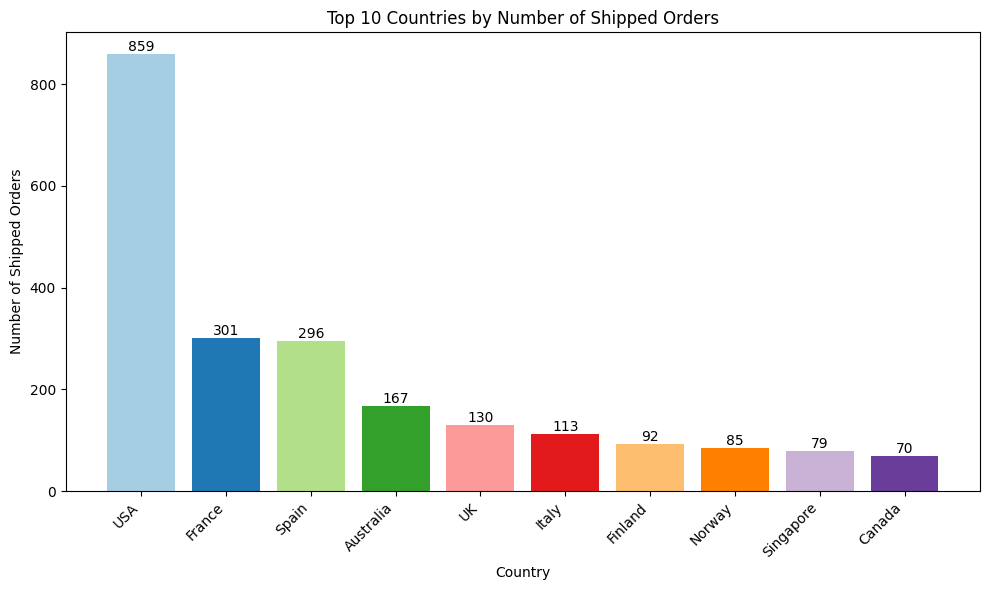

In [32]:
# Create a bar chart
plt.figure(figsize=(10, 6))

# Plot data
bars = plt.bar(df1['COUNTRY'], df1['shipped_order'], color=plt.cm.Paired.colors)

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Country')
plt.ylabel('Number of Shipped Orders')
plt.title('Top 10 Countries by Number of Shipped Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Find the Year by sale in which country

In [50]:
pd.read_sql_query('''

select COUNTRY , PRODUCTLINE , strftime('%Y', ORDERDATE) as year , count(ORDERNUMBER) as count_of_sale from autosale
group by year, PRODUCTLINE
order by year desc

''', conn)

,COUNTRY,PRODUCTLINE,year,count_of_sale
0,USA,Classic Cars,2020,156
1,France,Motorcycles,2020,58
2,Finland,Planes,2020,60
3,Finland,Ships,2020,36
4,Japan,Trains,2020,12
5,Australia,Trucks and Buses,2020,46
6,USA,Vintage Cars,2020,97
7,USA,Classic Cars,2019,440
8,France,Motorcycles,2019,164
9,Japan,Planes,2019,159


In [51]:
data = pd.read_sql_query('''

select  COUNTRY , PRODUCTLINE , strftime('%Y', ORDERDATE) as year , count(ORDERNUMBER) as count_of_sale  from autosale
group by year, PRODUCTLINE
order by year desc

''', conn)

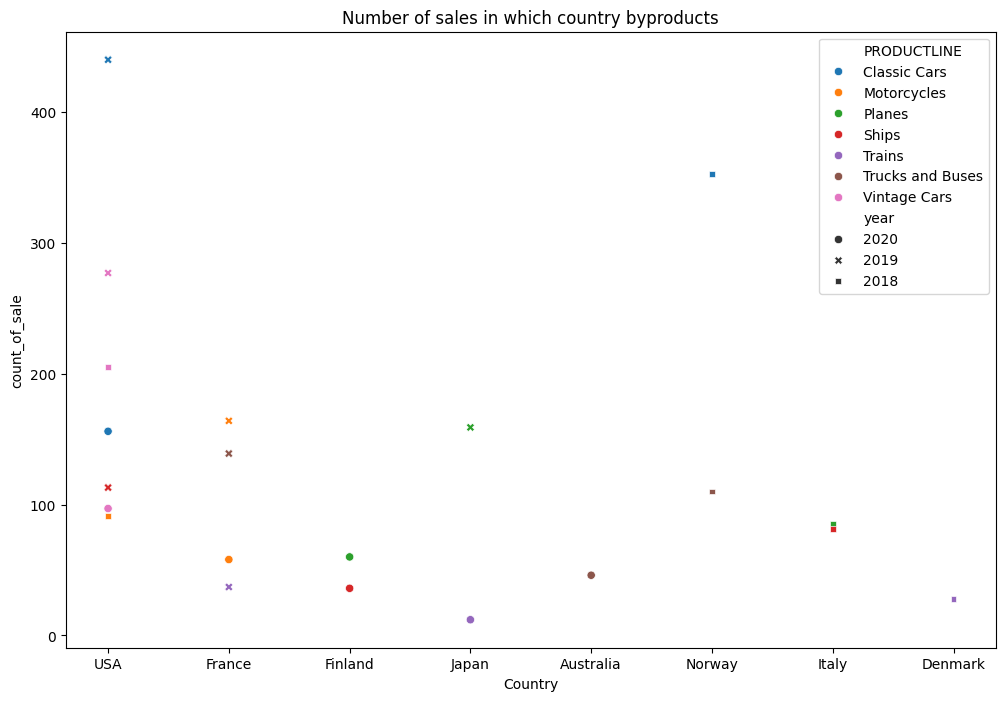

In [69]:
# Using Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='COUNTRY', y='count_of_sale', hue="PRODUCTLINE" , style='year', data=data, sizes=(20, 100))
plt.title('Number of sales in which country byproducts')
plt.xlabel('Country')
plt.ylabel('count_of_sale')
plt.show()


## Monthly Sales Count Over Years

In [67]:
pd.read_sql_query('''

SELECT strftime('%Y', ORDERDATE) as year , strftime('%m', ORDERDATE) AS months, count(ORDERNUMBER) as count_of_sale
FROM autosale
group by year, months
order by year, months

''', conn)

,year,months,count_of_sale
0,2018,01,39
1,2018,02,41
2,2018,03,44
3,2018,04,58
4,2018,05,58
5,2018,06,46
6,2018,07,50
7,2018,08,58
8,2018,09,76
9,2018,10,124


In [72]:
sale_year_month = pd.read_sql_query('''

SELECT strftime('%Y', ORDERDATE) as year , strftime('%m', ORDERDATE) AS months, count(ORDERNUMBER) as count_of_sale
FROM autosale
group by year, months
order by year, months

''', conn)

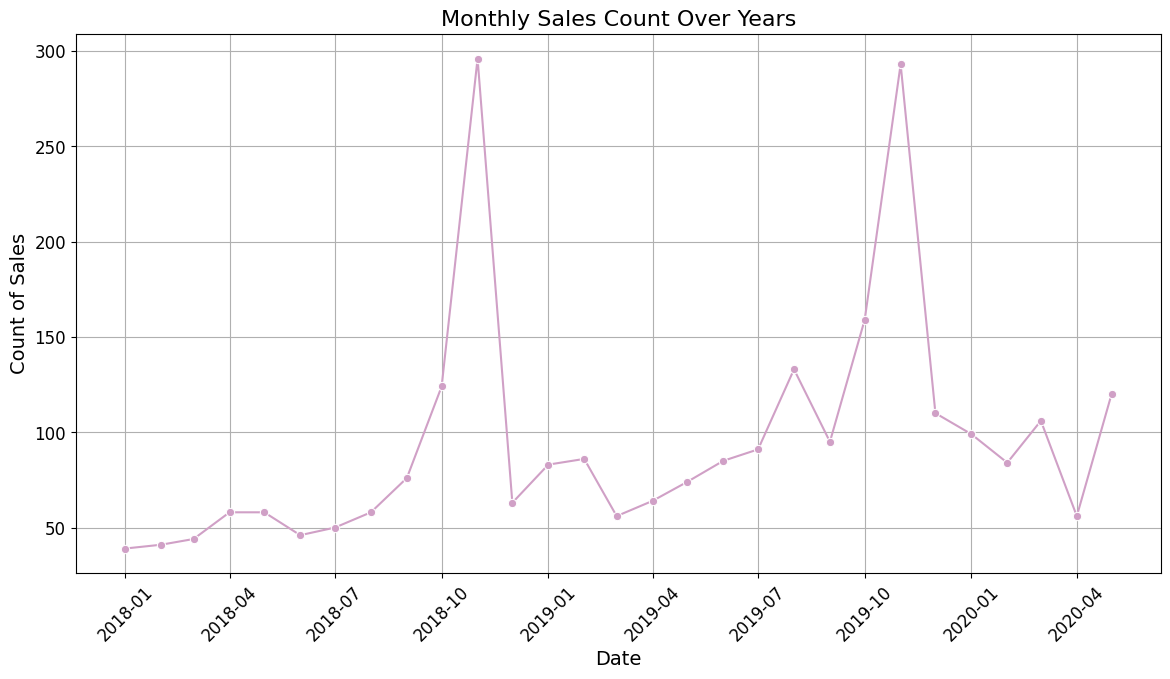

In [80]:
# Plot the line

# Combine year and month into a single datetime column
sale_year_month['date'] = pd.to_datetime(sale_year_month['year'] + '-' + sale_year_month['months'] + '-01')

# Sort by the new datetime column
sale_year_month = sale_year_month.sort_values(by='date')

# Plot the line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=sale_year_month, x='date', y='count_of_sale', marker='o', markerfacecolor='#D0A0C6', color='#D0A0C6')
# Customize the plot with titles and labels
plt.title('Monthly Sales Count Over Years', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count of Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


## Sales by Country in which year by monthly

In [81]:
pd.read_sql_query('''

SELECT COUNTRY, strftime('%Y', ORDERDATE) as year , strftime('%m', ORDERDATE) AS months, count(ORDERNUMBER) as count_of_sale
FROM autosale
group by COUNTRY, year, months
order by year, months

''', conn)

,COUNTRY,year,months,count_of_sale
0,Germany,2018,01,4
1,Norway,2018,01,16
2,Spain,2018,01,13
3,USA,2018,01,6
4,Denmark,2018,02,15
...,...,...,...,...
173,Canada,2020,05,9
174,France,2020,05,13
175,Italy,2020,05,14
176,Spain,2020,05,23


In [87]:
pd.read_sql_query('''

SELECT COUNTRY, PRODUCTLINE, strftime('%Y', ORDERDATE) as year , count(ORDERNUMBER) as count_of_sale
FROM autosale
group by COUNTRY
order by count(ORDERNUMBER) desc

''', conn)

,COUNTRY,PRODUCTLINE,year,count_of_sale
0,USA,Motorcycles,2018,928
1,Spain,Motorcycles,2020,342
2,France,Motorcycles,2018,314
3,Australia,Motorcycles,2019,185
4,UK,Motorcycles,2020,144
5,Italy,Classic Cars,2019,113
6,Finland,Motorcycles,2019,92
7,Norway,Motorcycles,2018,85
8,Singapore,Classic Cars,2018,79
9,Canada,Classic Cars,2018,70


In [88]:
data_c = pd.read_sql_query('''

SELECT COUNTRY, PRODUCTLINE, strftime('%Y', ORDERDATE) as year , count(ORDERNUMBER) as count_of_sale
FROM autosale
group by COUNTRY
order by count(ORDERNUMBER) desc

''', conn)

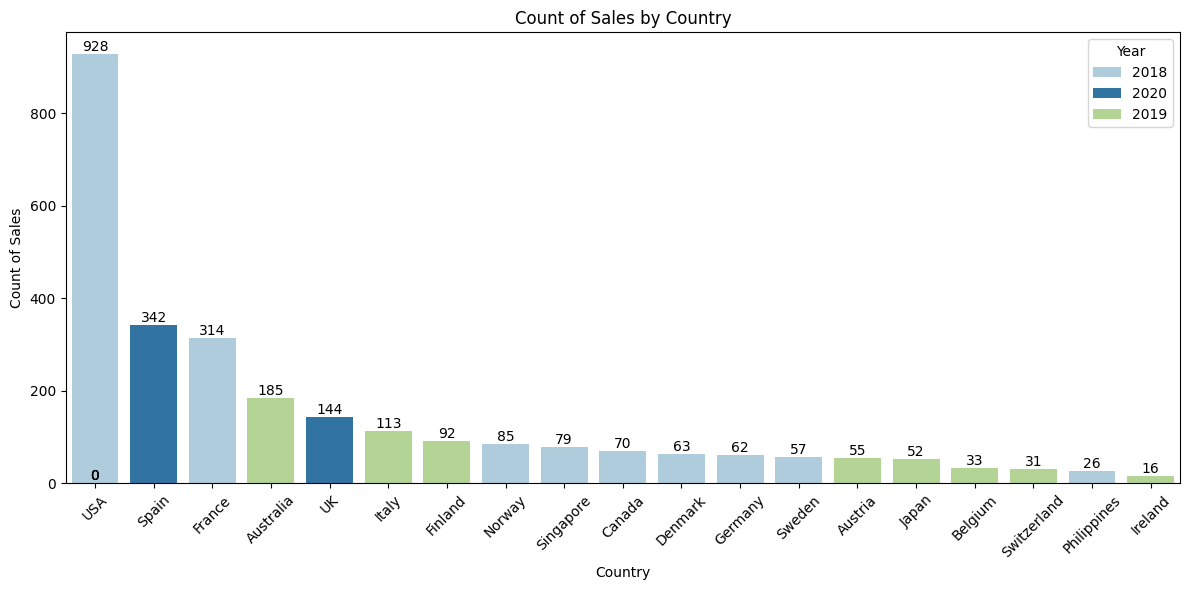

In [122]:
# Plot the displot
plt.figure(figsize=(12, 6))

barplot = sns.barplot(data=data_c, x='COUNTRY', y='count_of_sale', hue='year', palette=plt.cm.Paired.colors)

plt.title('Count of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Count of Sales')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')

# Add labels on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

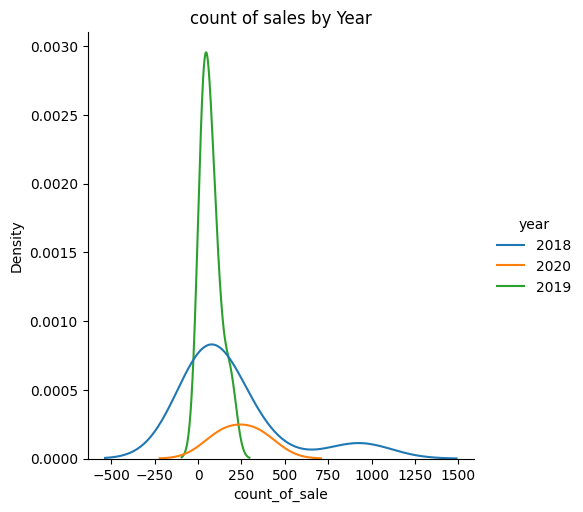

In [118]:
# Create the displot
#plt.figure(figsize=(14, 7))
sns.displot(data=data_c, x="count_of_sale", hue="year", kind="kde")
plt.title('count of sales by Year')

plt.show()

In [37]:
# Find the Correlation
object_columns = df.select_dtypes(include=['object']).columns
df_numeric = df.drop(columns=object_columns)
df_numeric.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,0.982862,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,0.059549,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.006688,-0.397091,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,-0.045635,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,0.030891,-0.334274,0.634849
ORDERDATE,0.982862,0.059549,-0.006688,-0.045635,0.030891,1.000000,-0.252259,-0.016465
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397091,0.046615,-0.334274,-0.252259,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.016465,-0.524285,1.000000


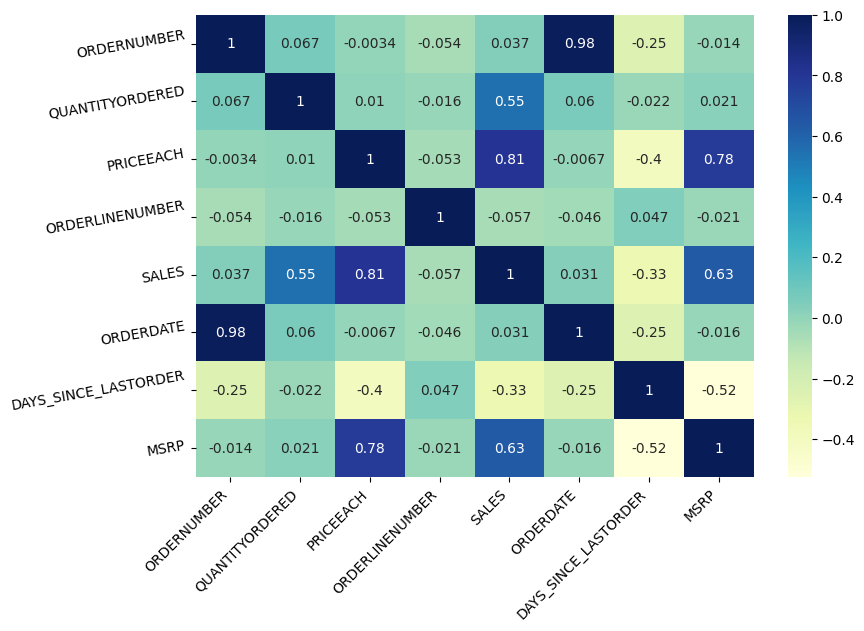

In [38]:
# Correlation Heatmap visualization code
plt.figure(figsize=(9, 6))

dataplot = sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True) # Multivariant analysis

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=10, ha='right')

# displaying heatmap
plt.show()

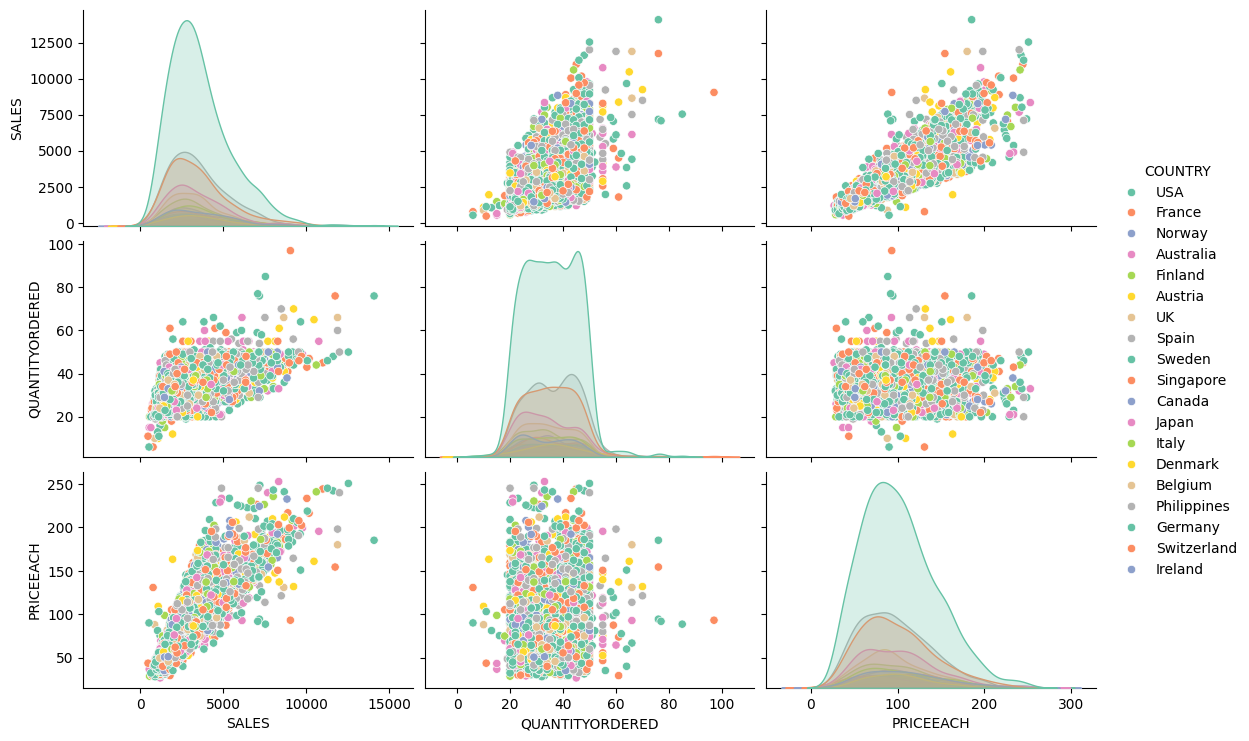

In [39]:
# Pairplot
desired_columns = ['COUNTRY', 'STATUS', 'PRODUCTLINE', 'SALES','QUANTITYORDERED', 'PRICEEACH']
subset_df = df[desired_columns]
sns.pairplot(subset_df, hue='COUNTRY', diag_kind="kde", palette='Set2', height=2.5, aspect=1.5)
plt.show()